# <center style='color:purple'>`Isolation Forest` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 2. Load dataset

In [2]:
df = pd.read_csv('data.csv', names=['Feature 1', 'Feature 2'], header=None)
df.head()

,Feature 1,Feature 2
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043


In [3]:
df.shape

(307, 2)

# 3. Visualize the data

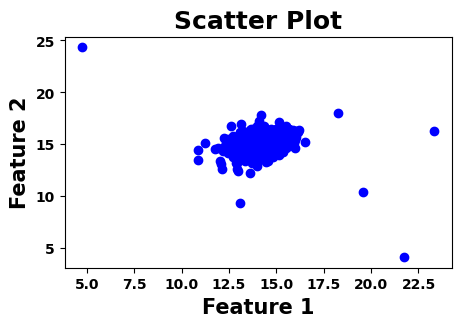

In [4]:
plt.figure(figsize=(5, 3))
plt.scatter(df['Feature 1'], df['Feature 2'], color='b')

plt.xlabel('Feature 1', fontsize=15, fontweight='bold')
plt.ylabel('Feature 2', fontsize=15, fontweight='bold')
plt.title('Scatter Plot', fontsize=18, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold');
plt.savefig('scatter_plot.jpg', dpi=300, bbox_inches='tight');

# 4. Apply `Isolation Forest`

In [5]:
isf = IsolationForest(contamination=0.1, random_state=42)
isf.fit(df[['Feature 1', 'Feature 2']])

IsolationForest(contamination=0.1, random_state=42)

In [6]:
preds = isf.predict(df[['Feature 1', 'Feature 2']])
preds

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

In [7]:
df['anomaly_scores'] = isf.decision_function(df[['Feature 1', 'Feature 2']])
df['anomaly'] = preds
df.head()

,Feature 1,Feature 2,anomaly_scores,anomaly
0,13.047,14.741,0.077536,1
1,13.409,13.763,0.044772,1
2,14.196,15.853,0.091454,1
3,14.915,16.174,0.063946,1
4,13.577,14.043,0.068232,1


In [8]:
df[df['anomaly'] == -1].head()

,Feature 1,Feature 2,anomaly_scores,anomaly
8,16.163,16.203,-0.014375,-1
10,13.985,12.958,-0.024214,-1
19,12.074,13.067,-0.070228,-1
46,16.001,14.692,-0.003765,-1
69,12.956,12.437,-0.056661,-1


In [9]:
anomaly_indices = np.where(preds < 0)
anomaly_indices

(array([  8,  10,  19,  46,  69,  71, 109, 113, 114, 119, 124, 142, 145,
        147, 170, 199, 207, 213, 222, 226, 241, 249, 275, 279, 299, 300,
        301, 303, 304, 305, 306]),)

# 5. Visualize outliers within the data

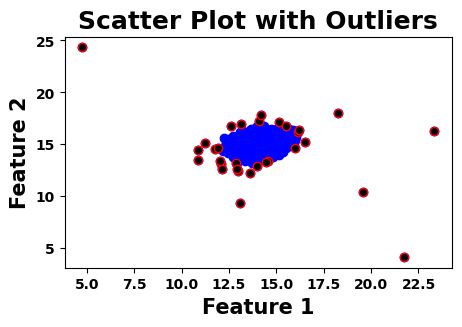

In [10]:
plt.figure(figsize=(5, 3))
plt.scatter(df['Feature 1'], df['Feature 2'], color='b')
plt.scatter(df.values[anomaly_indices, 0], df.values[anomaly_indices, 1], color='k', edgecolor='r')

plt.xlabel('Feature 1', fontsize=15, fontweight='bold')
plt.ylabel('Feature 2', fontsize=15, fontweight='bold')
plt.title('Scatter Plot with Outliers', fontsize=18, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold');
plt.savefig('scatter_plot_with_outliers.jpg', dpi=300, bbox_inches='tight');

In [11]:
df[df['anomaly'] != -1].shape # data without outlier

(276, 4)

In [12]:
df[df['anomaly'] == -1].shape # outlier

(31, 4)

In [13]:
df[df['anomaly'] == -1].reset_index()

,index,Feature 1,Feature 2,anomaly_scores,anomaly
0,8,16.1630,16.2030,-0.014375,-1
1,10,13.9850,12.9580,-0.024214,-1
2,19,12.0740,13.0670,-0.070228,-1
3,46,16.0010,14.6920,-0.003765,-1
4,69,12.9560,12.4370,-0.056661,-1
5,71,15.1290,17.1500,-0.045722,-1
6,109,11.2490,15.1330,-0.124291,-1
7,113,14.0740,17.2200,-0.038165,-1
8,114,14.1820,17.8340,-0.118154,-1
9,119,15.5250,16.7870,-0.005156,-1


In [14]:
df[df['anomaly'] == -1].reset_index(drop=True)

,Feature 1,Feature 2,anomaly_scores,anomaly
0,16.1630,16.2030,-0.014375,-1
1,13.9850,12.9580,-0.024214,-1
2,12.0740,13.0670,-0.070228,-1
3,16.0010,14.6920,-0.003765,-1
4,12.9560,12.4370,-0.056661,-1
5,15.1290,17.1500,-0.045722,-1
6,11.2490,15.1330,-0.124291,-1
7,14.0740,17.2200,-0.038165,-1
8,14.1820,17.8340,-0.118154,-1
9,15.5250,16.7870,-0.005156,-1


In [15]:
df[df['anomaly'] != -1].reset_index(drop=True).iloc[:, :-2]

,Feature 1,Feature 2
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043
...,...,...
271,14.523,14.230
272,14.300,15.266
273,14.558,15.487
274,14.225,15.861
